In [22]:
# Import the dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import time

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kundiawa
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | abay
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | kutum
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | valdivia
Processing Record 13 of Set 1 | beloha
Processing Record 14 of Set 1 | plettenberg bay
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | cukai
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | tecolutla
Processing Record 20 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 1 | mufulira
Processing Record 22 of Set 1 | to

Processing Record 38 of Set 4 | kholodnyy
Processing Record 39 of Set 4 | port moresby
Processing Record 40 of Set 4 | pauini
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | bom jesus
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | cody
Processing Record 49 of Set 4 | qena
Processing Record 50 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | vrhnika
Processing Record 2 of Set 5 | correia pinto
Processing Record 3 of Set 5 | alekseyevka
Processing Record 4 of Set 5 | sekoma
Processing Record 5 of Set 5 | duluth
Processing Record 6 of Set 5 | half moon bay
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | caconda
Processing Record 9 of Set 5 | marand
Processing Record 10 of Set 5 | naze
Processing Reco

Processing Record 28 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 29 of Set 8 | marana
Processing Record 30 of Set 8 | gat
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | presidencia roque saenz pena
Processing Record 33 of Set 8 | kajaani
Processing Record 34 of Set 8 | piacabucu
Processing Record 35 of Set 8 | bacuit
City not found. Skipping...
Processing Record 36 of Set 8 | srivardhan
Processing Record 37 of Set 8 | upernavik
Processing Record 38 of Set 8 | shelburne
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | slave lake
Processing Record 41 of Set 8 | bhabua
Processing Record 42 of Set 8 | shurugwi
Processing Record 43 of Set 8 | esil
Processing Record 44 of Set 8 | samarai
Processing Record 45 of Set 8 | vredendal
Processing Record 46 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 47 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 48 of Set 8 | imeni babushkina
Processing 

Processing Record 10 of Set 12 | am timan
Processing Record 11 of Set 12 | changli
Processing Record 12 of Set 12 | bereda
Processing Record 13 of Set 12 | kolda
Processing Record 14 of Set 12 | hokitika
Processing Record 15 of Set 12 | peniche
Processing Record 16 of Set 12 | sao gabriel da cachoeira
Processing Record 17 of Set 12 | abu samrah
Processing Record 18 of Set 12 | manaus
Processing Record 19 of Set 12 | sorvag
City not found. Skipping...
Processing Record 20 of Set 12 | yumen
Processing Record 21 of Set 12 | dickinson
Processing Record 22 of Set 12 | antsohihy
Processing Record 23 of Set 12 | la asuncion
Processing Record 24 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 25 of Set 12 | airai
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | turkistan
Processing Record 28 of Set 12 | eyl
Processing Record 29 of Set 12 | la palma
Processing Record 30 of Set 12 | clyde river
Processing Record 31 of Set 12 | husavik
Processing Record 

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.63,77,100,13.44,PF,2021-09-25 06:07:38
1,Kundiawa,-6.0167,144.9667,68.65,88,66,0.31,PG,2021-09-25 06:07:39
2,Albany,42.6001,-73.9662,53.46,92,0,1.61,US,2021-09-25 06:07:39
3,Ushuaia,-54.8000,-68.3000,37.06,81,20,8.05,AR,2021-09-25 06:04:18
4,Mataura,-46.1927,168.8643,42.48,95,76,8.63,NZ,2021-09-25 06:02:50
5,Esperance,-33.8667,121.9000,64.17,52,81,17.74,AU,2021-09-25 06:07:39
6,Atuona,-9.8000,-139.0333,78.15,79,75,18.30,PF,2021-09-25 06:07:40
7,Abay,49.6311,72.8539,55.78,22,8,4.76,KZ,2021-09-25 06:07:40
8,Cherskiy,68.7500,161.3000,34.84,98,100,17.54,RU,2021-09-25 06:07:41
9,Kutum,14.2000,24.6667,77.18,22,99,4.14,SD,2021-09-25 06:07:41


In [30]:
len(city_data)

587

In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-25 06:07:38,-23.1203,-134.9692,73.63,77,100,13.44
1,Kundiawa,PG,2021-09-25 06:07:39,-6.0167,144.9667,68.65,88,66,0.31
2,Albany,US,2021-09-25 06:07:39,42.6001,-73.9662,53.46,92,0,1.61
3,Ushuaia,AR,2021-09-25 06:04:18,-54.8000,-68.3000,37.06,81,20,8.05
4,Mataura,NZ,2021-09-25 06:02:50,-46.1927,168.8643,42.48,95,76,8.63
...,...,...,...,...,...,...,...,...,...
582,Soyo,AO,2021-09-25 06:12:13,-6.1349,12.3689,75.63,86,46,7.09
583,Finnsnes,NO,2021-09-25 06:12:13,69.2296,17.9811,43.34,94,100,2.35
584,Hay River,CA,2021-09-25 06:12:14,60.8156,-115.7999,48.33,78,2,8.63
585,Nuuk,GL,2021-09-25 06:12:14,64.1835,-51.7216,30.38,51,0,15.35


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

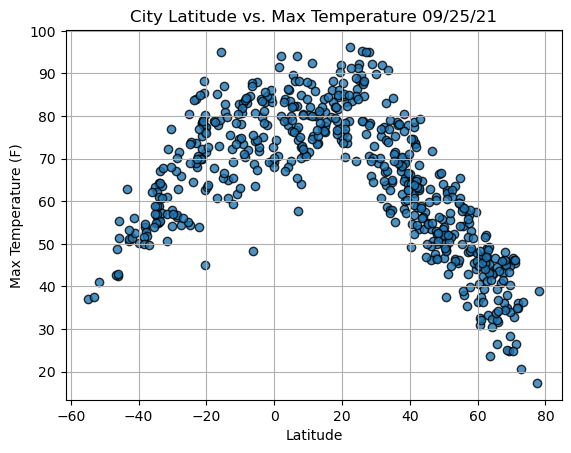

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

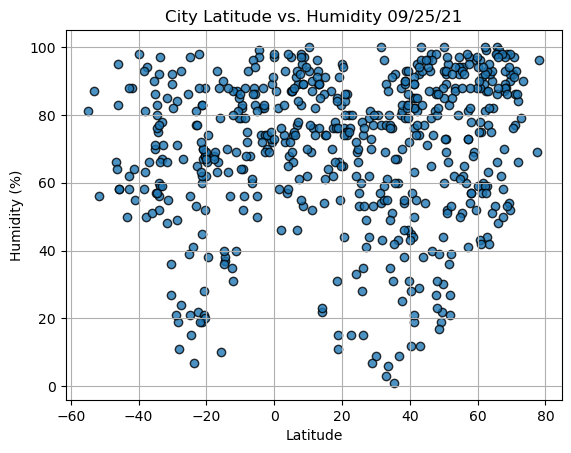

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

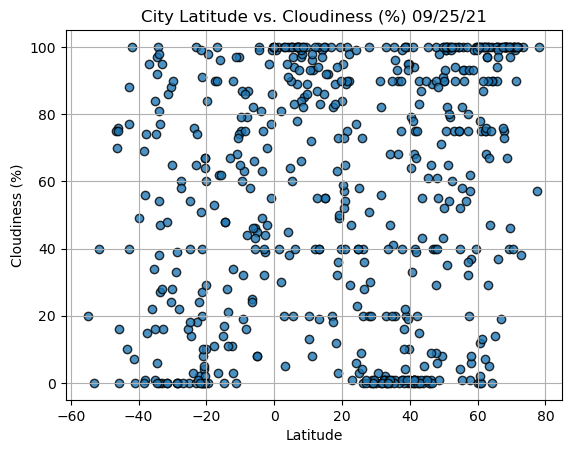

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

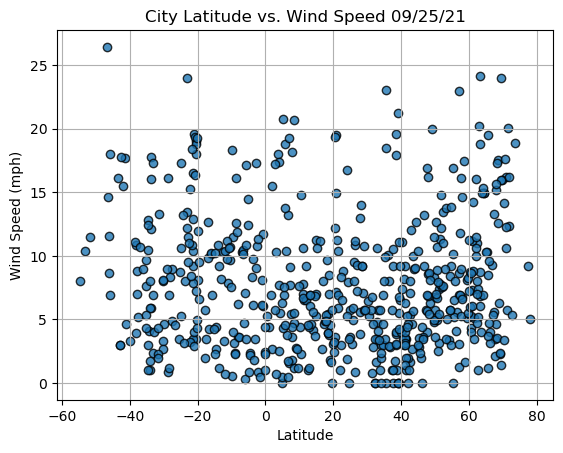

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City              Plettenberg Bay
Country                        ZA
Date          2021-09-25 06:07:44
Lat                      -34.0527
Lng                       23.3716
Max Temp                     63.7
Humidity                       60
Cloudiness                     54
Wind Speed                   1.72
Name: 13, dtype: object

In [41]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
582    False
583     True
584     True
585     True
586     True
Name: Lat, Length: 587, dtype: bool

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-09-25 06:07:39,42.6001,-73.9662,53.46,92,0,1.61
7,Abay,KZ,2021-09-25 06:07:40,49.6311,72.8539,55.78,22,8,4.76
8,Cherskiy,RU,2021-09-25 06:07:41,68.7500,161.3000,34.84,98,100,17.54
9,Kutum,SD,2021-09-25 06:07:41,14.2000,24.6667,77.18,22,99,4.14
10,Khatanga,RU,2021-09-25 06:07:42,71.9667,102.5000,36.19,66,100,12.37


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

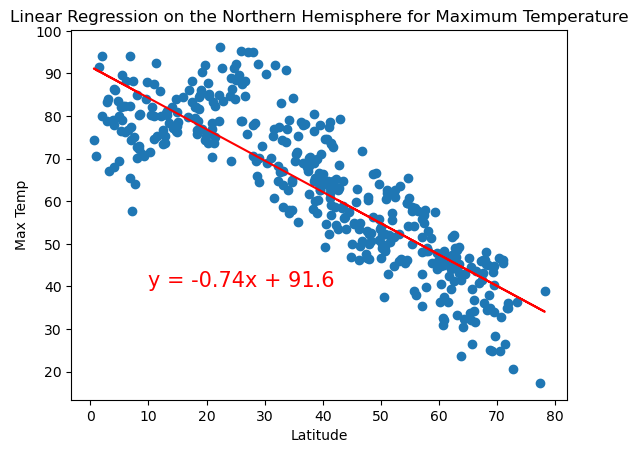

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

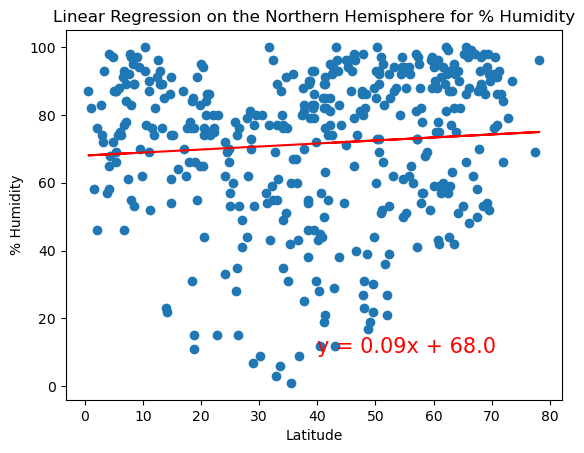

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

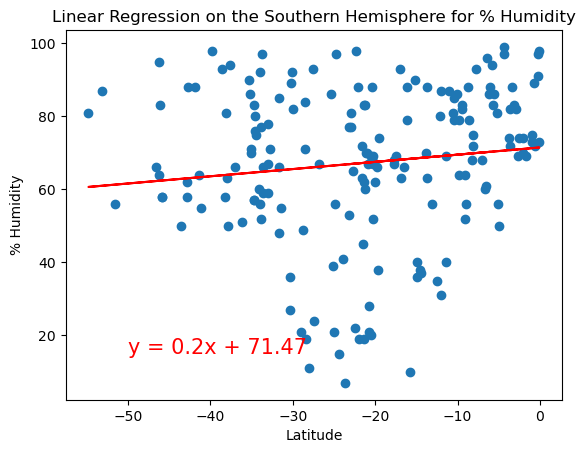

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

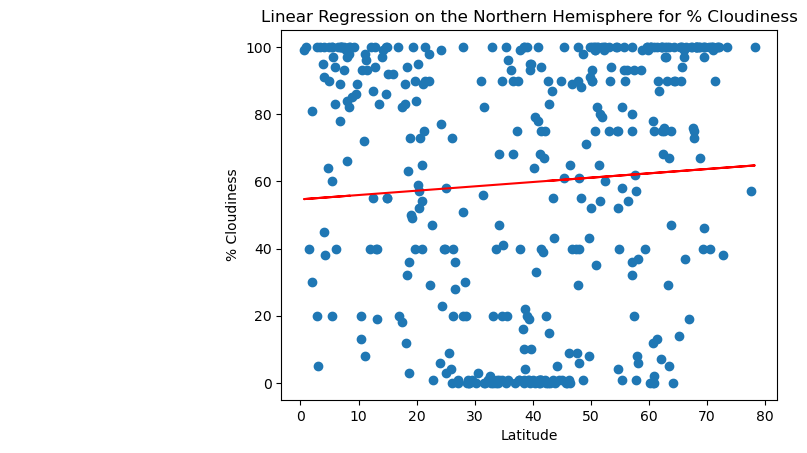

In [71]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

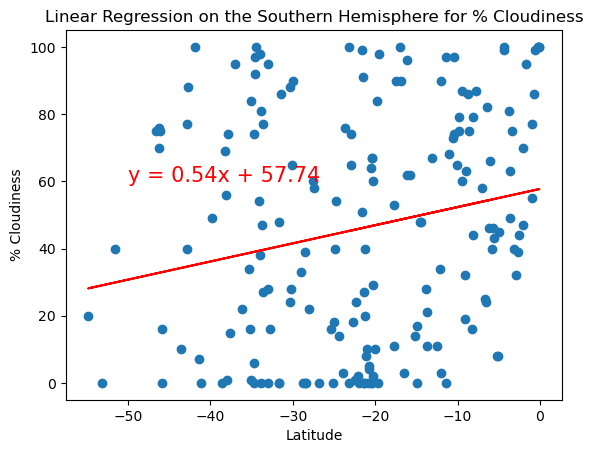

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

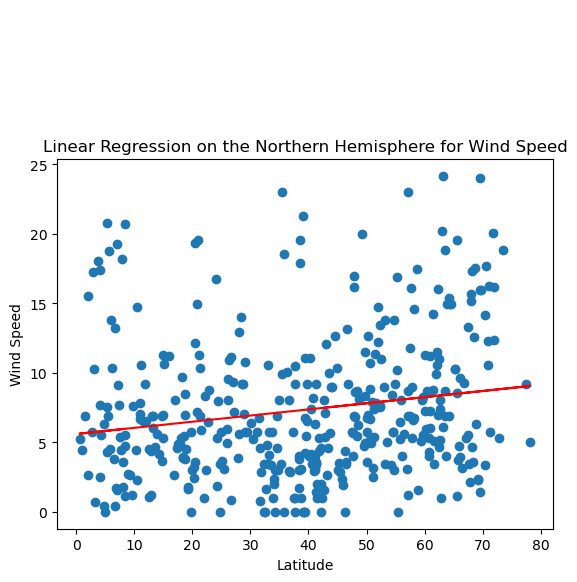

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

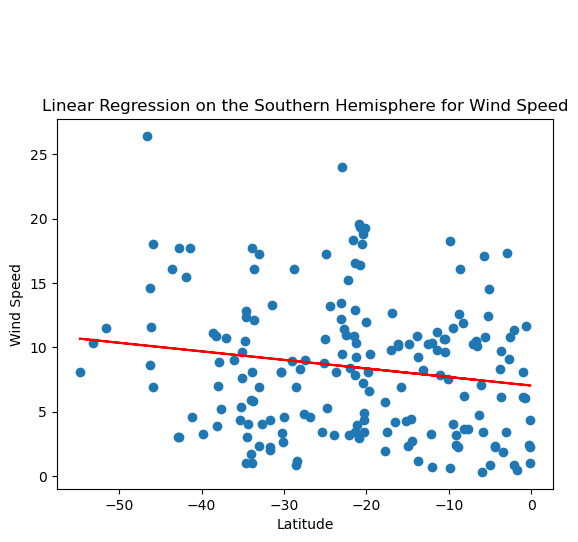

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))